
# HW 9: Neural Networks with Keras
## Sample solution

---

**Overview**

`keras` is a convenience layer over `tensorflow`.  Let's review the workflow we had yesterday in `tensorflow`:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

The "big" steps were 5 and 6.

- 5 Build the network by creating linked `dense` layers.
- 6 Iterate over epochs (and possibly batches), explicitly calling on the session to execute a "training op"

In `keras` these to steps are simplified.

- 5 Add layers to a "model".
- 6 Compile and fit the model. (as little as 2 lines of code!)

---

**Regardless of the tool that you are using**, keep in mind the following concepts:

- What will your network topology (number of hidden layers and units per layer) be?
- What activation function will you use for the hidden layers?
- Based on your model, how many units will be in your input and output layers?
- Based on your model, what will the activation function on your output layer be?
- What will your loss function be?
- What optimizer will you use for the gradient descent/backpropogation?

## Regression Model

In [0]:
!pip install -q keras

In [0]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"


In [0]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [0]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
data = load_diabetes()
#show the description of this data below
print (data.keys())#find out what keys are likely to be the description
print(data.DESCR)#DESCR seems to be the description

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source U

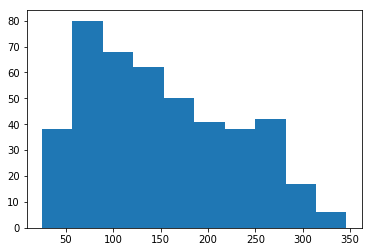

In [0]:
#show the histogram distribution of the targets
plt.hist(data.target);

Note that the data matrix (i.e., input features) are stored in `data.data`; the target values are stored in `data.target`.

To prepare your data...

1. Split your data into train and test sets.
2. Standardize your data.

> Note that the description indicate that these data have already been scaled.  Let's go through the motions and scale explicitly here, since you typically will _not_ have someone else scaling your data for you. 

In [0]:
import pandas as pd
diabetes = pd.DataFrame(data.data, columns = data.feature_names)
diabetes['target'] = pd.Series(data.target)
diabetes.describe().T
#Note all features have 0 mean but standard deviation is not 1

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target)

#Use StandardScaler to scale the input part
ss=StandardScaler()
X_train =ss.fit_transform(X_train)
X_test =ss.transform(X_test)
#Show the dimension of X_train
X_train.shape

(331, 10)

In [0]:
#Checking to see if all features have 0 mean and standard deviation as 1
pd.DataFrame(X_train).describe().T

,count,mean,std,min,25%,50%,75%,max
0,331.0,2.515611e-17,1.001514,-2.268386,-0.785292,0.151399,0.775859,2.415068
1,331.0,-2.482070e-17,1.001514,-0.944155,-0.944155,-0.944155,1.059148,1.059148
2,331.0,-6.708296e-18,1.001514,-1.865054,-0.736722,-0.149990,0.617276,3.596072
3,331.0,3.555397e-17,1.001514,-2.366155,-0.742744,-0.078622,0.720785,2.725452
4,331.0,-7.714541e-18,1.001514,-2.102995,-0.726414,-0.124159,0.564132,3.202579
5,331.0,4.159144e-17,1.001514,-2.339294,-0.681395,-0.120161,0.634602,4.079417
6,331.0,-1.207493e-17,1.001514,-2.160791,-0.682819,-0.138303,0.639577,3.828886
7,331.0,-1.012953e-16,1.001514,-1.601568,-0.835854,-0.070140,0.695574,3.827344
8,331.0,-1.844781e-17,1.001514,-2.635538,-0.704318,-0.084749,0.701237,2.841264
9,331.0,2.549153e-17,1.001514,-2.671304,-0.662338,-0.021178,0.577237,2.799923


In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
#build a feedforward NN with one hidden layer
input_size =X_train.shape[1]
model.add(Dense(input_size*2000, input_dim=input_size, init='uniform', activation='tanh'))
model.add(Dense(1, init='uniform', activation='relu'))#why use relu here?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20000, input_dim=10, activation="tanh", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
from keras.optimizers import Adam
#compile the model with loss='mean_squared_error' and optimizer=adam
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20000)             220000    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20001     
Total params: 240,001
Trainable params: 240,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Train the model with X_train, y_train and validation data as X_test, y_test
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=20,verbose=0);

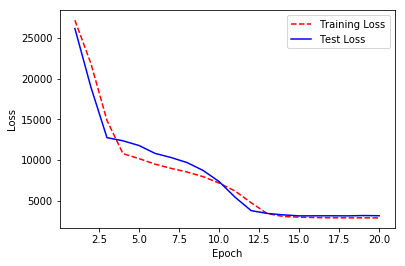

In [0]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Binary Classification

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)


In [0]:
model = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden*3, input_dim=n_input, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))#why sigmoid here?

**Repeat the steps (with appropirate modification )as in Regression model except use compile it with loss='binary_crossentropy' **

In [0]:
#Show the training and testing loss profile curves

In [0]:
from keras.optimizers import Adam
#compile the model with loss='binary_crossentropy' and optimizer=adam
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 90)                2790      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 91        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Train the model with X_train, y_train and validation data as X_test, y_test
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=80,verbose=0);

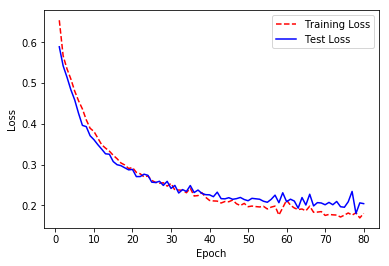

In [0]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [0]:
score =model.evaluate(X_test, y_test,  verbose=0)
print('prediction score: %.2f%%' % (score[1]*100)  )

prediction score: 93.01%


## Multi-Class Classification

In [0]:
from sklearn.datasets import load_iris
from keras.utils import to_categorical

In [0]:
data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [0]:
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)
print('y_train original dimension', y_train.shape, 'y_train dimension after one-hot-encoding', y_train_c.shape )
n_output = pd.Series(data.target).nunique()
print('number of distinct outputs:', n_output)

y_train original dimension (112,) y_train dimension after one-hot-encoding (112, 3)
number of distinct outputs: 3


**Repeat the steps (with appropirate modification )as in Regression model except use compile it with loss='categorical_crossentropy''**

In [0]:
#Plot the training and testing loss courves

In [0]:
model = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input*3

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model.add(Dense(n_output, activation='sigmoid'))

In [0]:
#Show the training and testing loss profile curves

In [0]:
from keras.optimizers import Adam
#compile the model with loss='categorical_crossentropy' and optimizer=adam
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                60        
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 39        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Train the model with X_train, y_train and validation data as X_test, y_test
history = model.fit(X_train, y_train_c, validation_data=(X_test, y_test_c),epochs=500,verbose=0);

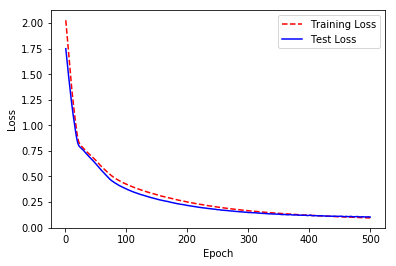

In [0]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [0]:
score =model.evaluate(X_test, y_test_c,  verbose=0)
print('prediction score: %.2f%%' % (score[1]*100)  )

prediction score: 97.37%


## Optional comparison with other algorithms

In [0]:
#Let's see how good is RandomForest
from sklearn.ensemble import RandomForestClassifier
logit = RandomForestClassifier()
logit.fit(X_train, y_train)
print ("RandomForest Accuracy: {}".format(logit.score(X_test, y_test)))

RandomForest Accuracy: 0.9473684210526315


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
#Let's review how MLPClassifier got trained and do prediction
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50), activation='relu')
mlp.fit(X_train, y_train)
score =mlp.score(X_test, y_test)
print('MLP NN score:', score)

MLP NN score: 0.9473684210526315


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

###CNN

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
# reshape to be [samples][pixels][width]
X_train = X_train.reshape(X_train.shape[0],  1, 4).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 4).astype('float32')
#One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
#Note we have one-hot-encoding for output now
y_train.shape

(120, 3)

In [0]:
#X is now 3-D
X_train.shape[0:]

(120, 1, 4)

In [0]:
# Convolutional Neural Network
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

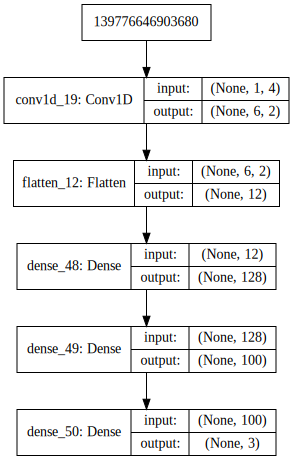

In [0]:
# create model
model = Sequential()
model.add(Conv1D(6, kernel_size=(3), activation='relu',data_format = 'channels_first',
               input_shape=X_train.shape[1:]))
# model.add(Dropout(0.2))
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Conv1D(6, (2), activation='relu'))
# model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))#try adding few more Dense layers
model.add(Dense(num_classes, activation='sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Visualize network architecture
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=90, batch_size=200, verbose=0)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 100.00%


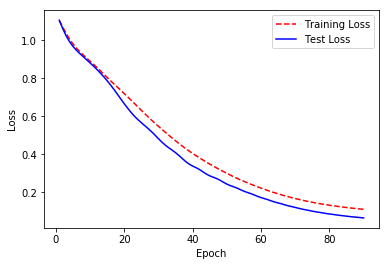

In [0]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();